In [2]:
import albumentations as A
import cv2
import random
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import numpy.ma as ma
from numpy import asarray

In [3]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [4]:
transform = A.Compose([
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(p=1, distort_limit=1, shift_limit=0.5),
    ], p=0.8)])

In [5]:
image = cv2.imread(r"C:\Users\ale8p\OneDrive\Escritorio\HACKATHON\image_1_pleiades.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask1 = cv2.imread(r"C:\Users\ale8p\OneDrive\Escritorio\HACKATHON\mascaras\image_1_mask.png")
mask2 = cv2.imread(r"C:\Users\ale8p\OneDrive\Escritorio\HACKATHON\mascaras\image_1_tree_mask.png")
masks = [mask1,mask2]

In [6]:
transformed = transform(image=image, masks=masks)
transformed_image = transformed['image']
transformed_masks = transformed['masks']

In [92]:
#Mask mixer
shadow_mask = Image.open(r"C:\Users\ale8p\OneDrive\Escritorio\HACKATHON\mascaras\image_10_mask.png")
tree_mask =  Image.open(r"C:\Users\ale8p\OneDrive\Escritorio\HACKATHON\mascaras\image_10_tree_mask.png")

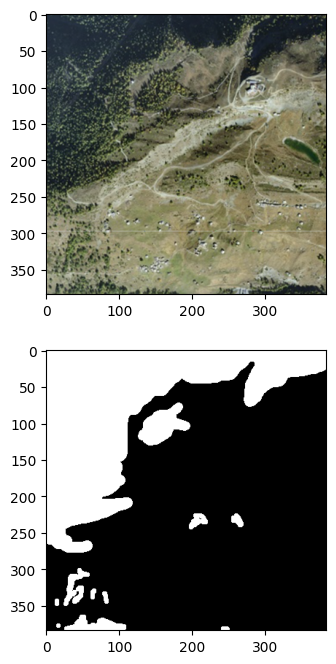

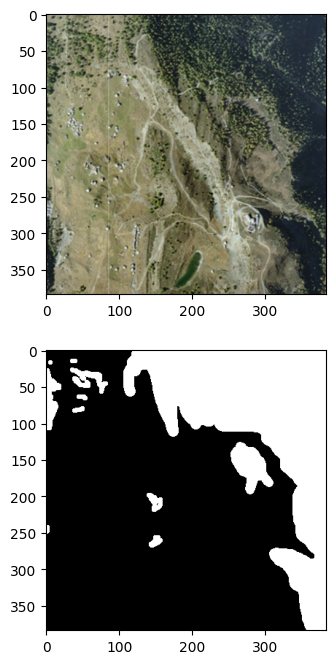

In [93]:
visualize(image,masks[1])
visualize(transformed_image,transformed_masks[1])

In [96]:
shadow_numpy = asarray(shadow_mask)
tree_numpy = asarray(tree_mask)
shadow_numpy = np.where(shadow_numpy<=125,0,shadow_numpy)
shadow_numpy = np.where(shadow_numpy>=126,255,shadow_numpy)
tree_numpy = np.where(tree_numpy<=125,0,tree_numpy)
tree_numpy = np.where(tree_numpy>=126,255,tree_numpy)

mixed_numpy = np.zeros((384,384)).astype(int)
shadow_indexes = np.where(shadow_numpy)
tree_indexes = np.where(tree_numpy)
tree_indexes

(array([  0,   0,   0, ..., 383, 383, 383], dtype=int64),
 array([  0,   1,   2, ..., 381, 382, 383], dtype=int64),
 array([3, 3, 3, ..., 3, 3, 3], dtype=int64))

In [97]:
shadow_indexes_tuples=[]
for i in range(shadow_indexes[0].size):
    tupla = (shadow_indexes[0][i],shadow_indexes[1][i])
    shadow_indexes_tuples.append(tupla)

tree_indexes_tuples=[]
for i in range(tree_indexes[0].size):
    tupla = (tree_indexes[0][i],tree_indexes[1][i])
    tree_indexes_tuples.append(tupla)


In [98]:
for i in shadow_indexes_tuples:
    mixed_numpy[i[0]][i[1]]=1
for i in tree_indexes_tuples:
    mixed_numpy[i[0]][i[1]]=2

In [99]:
mixed_numpy
new_mixed_numpy = mixed_numpy.astype(np.uint8)
new_mixed_numpy=np.dstack((new_mixed_numpy, new_mixed_numpy,new_mixed_numpy))

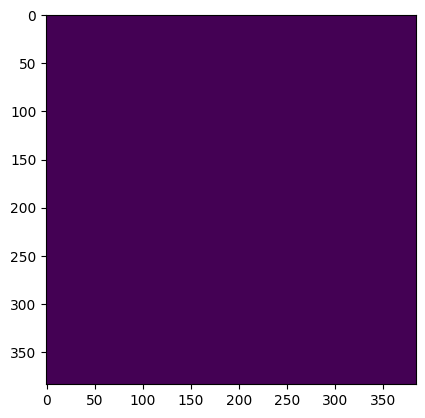

In [100]:
plt.imshow(mixed_numpy) 

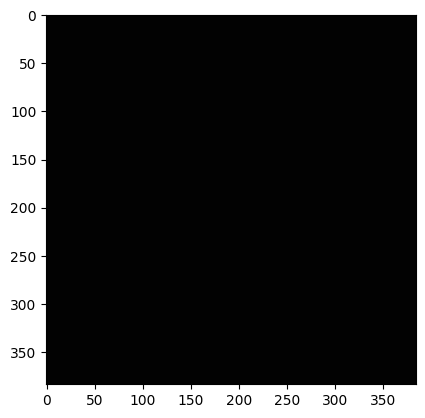

In [101]:
plt.imshow(new_mixed_numpy)

In [103]:
im = Image.fromarray(new_mixed_numpy)
im.save(r"C:\Users\ale8p\OneDrive\Escritorio\HACKATHON\image_10_fullmask.png")